In the following code below, I will be comparing the two Ney York Yankees right handed Batters 
who are very well known for hitting home runs. In this project, I would like to compare their hitting styles and what would be the best places to pitch to them. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


judge = pd.read_csv("judge.csv")


stanton = pd.read_csv("stanton.csv")
pd.set_option('display.max_columns', None)

judge.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,FF,2017-09-30,95.7,-2.3581,5.9240,Aaron Judge,592450,608678,strikeout,swinging_strike,NaN,NaN,NaN,NaN,14.0,Aaron Judge strikes out swinging.,R,R,R,NYY,TOR,S,NaN,NaN,0,2,2017,-0.7350,1.6774,1.0150,2.5730,NaN,543305.0,NaN,1,7,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_192117,10.5318,-138.4377,-6.8732,-12.0431,34.6021,-9.2112,3.8271,1.6673,NaN,NaN,NaN,95.025,2270.0,6.485,492513,608678.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.0129,0.0,0.0,0.0,1.0,0.0,0.0,NaN,53,3
1,FF,2017-09-30,96.3,-2.5577,5.9023,Aaron Judge,592450,608678,NaN,called_strike,NaN,NaN,NaN,NaN,9.0,NaN,R,R,R,NYY,TOR,S,NaN,NaN,0,1,2017,-0.7434,1.4761,0.4546,2.3005,NaN,543305.0,NaN,1,7,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_192050,9.6649,-139.7614,-7.3651,-11.7176,26.7988,-11.3563,3.9923,1.8663,NaN,NaN,NaN,96.812,2252.0,6.386,492513,608678.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.1114,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,2
2,FF,2017-09-30,95.2,-2.3861,5.8346,Aaron Judge,592450,608678,NaN,called_strike,NaN,NaN,NaN,NaN,2.0,NaN,R,R,R,NYY,TOR,S,NaN,NaN,0,0,2017,-1.2191,1.6332,0.0957,3.4049,NaN,543305.0,NaN,1,7,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_192030,9.2416,-138.0840,-4.3968,-17.6628,28.7817,-10.3700,4.0395,1.8899,NaN,NaN,NaN,95.468,2291.0,6.469,492513,608678.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.0285,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,1
3,FT,2017-09-30,93.4,4.2502,4.6506,Aaron Judge,592450,571901,walk,ball,NaN,NaN,NaN,NaN,14.0,Aaron Judge walks. Aaron Hicks to 2nd.,R,R,L,NYY,TOR,B,NaN,NaN,3,1,2017,1.7552,0.4911,1.5161,2.8389,NaN,NaN,543305.0,1,5,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_183328,-10.6258,-135.1424,0.1093,23.4366,30.9796,-26.5796,4.0732,2.0215,NaN,NaN,NaN,91.825,2175.0,5.767,492513,571901.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.7309,0.0,0.0,0.7,1.0,0.0,0.0,NaN,36,5
4,FT,2017-09-30,92.8,4.1144,4.4696,Aaron Judge,592450,571901,NaN,called_strike,NaN,NaN,NaN,NaN,14.0,NaN,R,R,L,NYY,TOR,S,NaN,NaN,3,0,2017,1.4123,0.1889,0.0764,1.7631,NaN,NaN,543305.0,1,5,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_183309,-13.1954,-134.2390,-1.4760,19.6908,28.6883,-29.8328,4.1575,2.0080,NaN,NaN,NaN,91.790,2171.0,5.975,492513,571901.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.5228,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36,4


In [2]:
judge_events_2017 = judge.loc[judge['game_year'] == 2017].events
print("Aaron Judge batted ball event totals, 2017:")
print(judge_events_2017.value_counts())

stanton_events_2017 = stanton.loc[stanton['game_year'] == 2017].events
print("\nGiancarlo Stanton batted ball event totals, 2017:")
print(stanton_events_2017.value_counts())

Aaron Judge batted ball event totals, 2017:
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
intent_walk                   11
force_out                     11
hit_by_pitch                   5
fielders_choice_out            4
sac_fly                        4
field_error                    4
triple                         3
strikeout_double_play          1
Name: events, dtype: int64

Giancarlo Stanton batted ball event totals, 2017:
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
intent_walk                   13
grounded_into_double_play     13
hit_by_pitch                   7
force_out                      7
field_error                    5
sac_fly             

Text(0.5,1,'Giancarlo Stanton\nHome Runs, 2017')

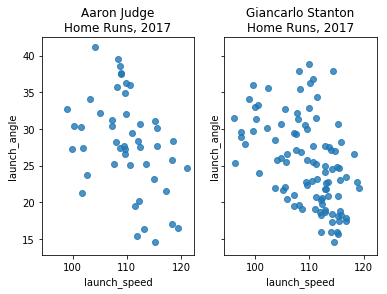

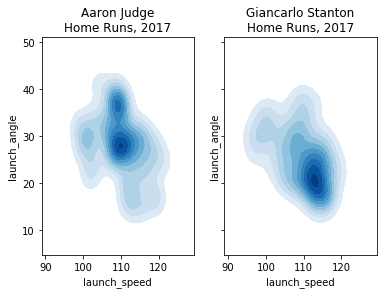

In [3]:
# Filter to include home runs only
judge_hr = judge.loc[judge['events'] == 'home_run']
judge_hr = judge_hr[judge_hr["hit_distance_sc"] >=0]
judge_hr = judge_hr.drop([125], axis = 0)
judge_hr = judge_hr[judge_hr.zone <=9]
stanton_hr = stanton.loc[stanton['events'] == 'home_run']
stanton_hr = stanton_hr[stanton_hr["hit_distance_sc"] >=0]
stanton_hr = stanton_hr[stanton_hr.zone<=9]

pd.set_option('display.max_columns', None)

fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x =judge_hr["launch_speed"], y =judge_hr["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.regplot(x= stanton_hr["launch_speed"], y=stanton_hr["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')

fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr["launch_speed"], judge_hr["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.kdeplot(stanton_hr["launch_speed"], stanton_hr["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')


From the above, it is visible from the provided data that Stanton tends to hit his home runs at a lower launch angle and with a greater a speed. From this we can see that because the Stanton tends to hit his home runs with a lower launch angle, he tends to hit them a lot flater in comparison to Judge.

Next will be comparing the launch angle and the distance.

Text(0.5,1,'Giancarlo Stanton\nHome Runs, 2017')

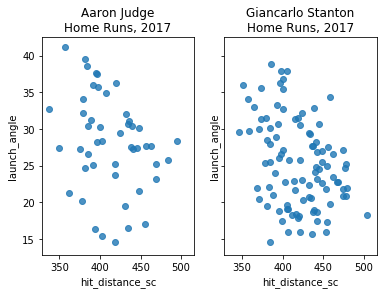

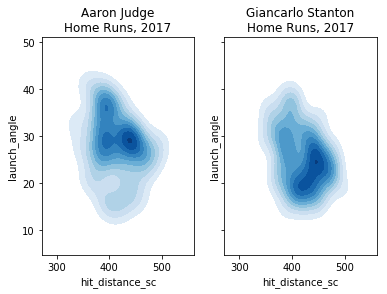

In [4]:
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x= judge_hr["hit_distance_sc"], y =judge_hr["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.regplot(x= stanton_hr["hit_distance_sc"], y =stanton_hr["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')

fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr["hit_distance_sc"], judge_hr["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.kdeplot(stanton_hr["hit_distance_sc"], stanton_hr["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')



From the above diagram, it is clearly visible that Stanton on average hits further than Judge because he tends to hit them more flatter and with greater velocity. 

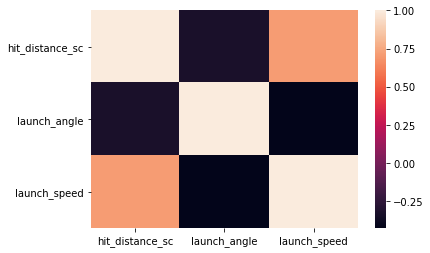

In [5]:
combination = pd.concat([judge_hr, stanton_hr])
values_both =combination[["hit_distance_sc","launch_angle", "launch_speed"]].corr()

sns.heatmap(values_both)

#features1 = judge_hr(["hit_distance_sc","launch_angle", "launch_speed"])

After combining both players home_run records, it is visible that there is a strong correlation between the speed at which the batter hits the ball and the distance at which it travels - being positively correlated. 

In [6]:
random_variable_1 = combination["hit_distance_sc"]
random_variable_2 = combination["launch_angle"]
random_variable_3 = combination["launch_speed"  ]

Find out a way to see if we can compare all there variables 

Text(0.5,1,'Judge Home Runs,2017 with Release Speeds in MPH')

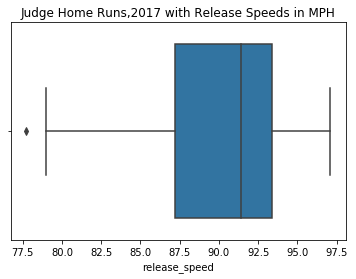

In [7]:
sns.boxplot(judge_hr["release_speed"], color = 'tab:blue').set_title('Judge Home Runs,2017 with Release Speeds in MPH')

Text(0.5,1,'Stanton Home Runs,2017 with Release Speeds in MPH')

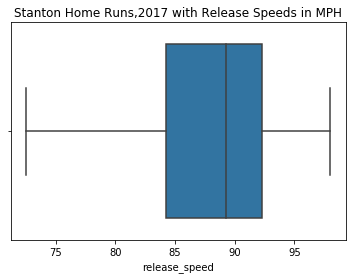

In [8]:
sns.boxplot(stanton_hr["release_speed"], color = 'tab:blue').set_title('Stanton Home Runs,2017 with Release Speeds in MPH')

Even though there is a very slight difference in the range between Judge and Stanton's 25 and 75 percentile. Judge tends to latch on to pitches which are slightly faster in comparison to Stanton and with his mean launch angle being higher than Statons, it is visible that he uses the pace off the pitcher and with a good launch angle he is still able to hit home runs. Where as Stanton seems to be the type of hitter that converts those balls which are between the 85 and 92 miles per hour range and swing them harder and flatter. 

In [9]:
def assign_x_coord(row):
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3
def assign_y_coord(row):
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1

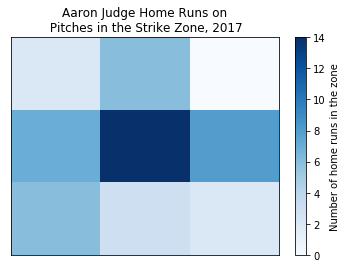

In [10]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis = 1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis = 1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judge_strike_hr['zone_x'] , judge_strike_hr['zone_y'] , bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Number of home runs in the zone')

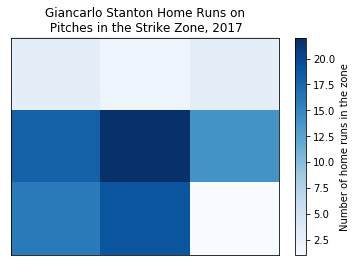

In [11]:
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis = 1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis = 1)
plt.hist2d(stanton_strike_hr['zone_x'] , stanton_strike_hr['zone_y'] , bins = 3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Number of home runs in the zone')

From the two strike zones it is visible that both are very strong in the middle zone - seems like the perfect ideal zone. 

Stantons strength lies in the middle inside of the strike zone. 
Whereas Judge is more spread out. 

Judge does not seem to be comfortable with the pitches that are on the top right.The reason could be that the further it is and with that height, it seems a bit harder to get underneath the ball to give it the right launch angle. 

Whereas Stanton seems to struggle with the outside and low of the strike zone. The reason could be that at that zone, because of the reach, it becomes harder to still be able to hit with that power that he relies on. The reach probably makes the swing less stronger makeing the ball travel less in terms of distance.


In [12]:
a = judge_hr.values[:,15]


In [13]:
i = []
for x in range(a.shape[0]):
    if "left" in a[x]:
        i.append("left")
    elif "right" in a[x]:
        i.append("right")
    elif "center" in a[x]:
        i.append("center")
    else:
        print(a[x])


judge_hr["areas_hit_to"] = i

In [14]:
zones = ["zone1", "zone2", "zone3", "zone4", "zone5", "zone6", "zone7", "zone8", "zone9"]


def zonedestination(zone):
    if zone == (1,1):
        return 1
    if zone == (1,2):
        return 2
    if zone == (1,3):
        return 3
    if zone == (2,1):
        return 4
    if zone == (2,2):
        return 5
    if zone == (2,3):
        return 6
    if zone == (3,1):
        return 7
    if zone == (3,2):
        return 8
    if zone == (3,3):
        return 9




In [15]:
hitting_areas_judge_left = np.zeros(9)
hitting_areas_judge_right = np.zeros(9)
hitting_areas_judge_center = np.zeros(9)

xs = judge_strike_hr["zone_x"]
ys = judge_strike_hr["zone_y"]

for x in range (len(judge_hr)):
    a = xs.iloc[x]
    b = ys.iloc[x]
    zone = (a, b)
    if (judge_hr["areas_hit_to"].iloc[x] == "left"):
        hitting_areas_judge_left[zonedestination(zone)-1]+=1
    elif (judge_hr["areas_hit_to"].iloc[x] == "center"):
        hitting_areas_judge_center[zonedestination(zone)-1]+=1
    else:
        hitting_areas_judge_right[zonedestination(zone)-1]+=1
hitting_areas_judge_right

array([0., 0., 0., 1., 6., 2., 1., 4., 0.])

In [16]:
hitting_areas_judge_left

array([5., 5., 2., 0., 4., 2., 1., 0., 0.])

In [17]:
hitting_areas_judge_center

array([1., 2., 0., 2., 4., 2., 0., 4., 0.])

Text(0.5,0,'zone')

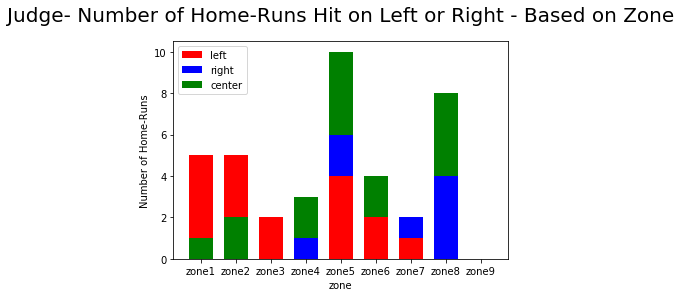

In [18]:
plt.figure()

p1 = plt.bar(zones, hitting_areas_judge_left, width = 0.7, color='red')
p2 = plt.bar(zones, hitting_areas_judge_right, bottom = hitting_areas_judge_left,width = 0.7, color='blue')
p3 = plt.bar(zones, hitting_areas_judge_center, bottom = hitting_areas_judge_right,width = 0.7, color='green')
plt.ylabel('Number of Home-Runs')
plt.title('Judge- Number of Home-Runs Hit on Left or Right - Based on Zone', pad='20', fontsize='20')
plt.legend((p1[0], p2[0], p3[0]), ('left', 'right', 'center'))
#plt.ylim(0,300)
#plt.xticks(x_values)
plt.xlabel('zone')

From the graph it is clearly visible that Judge is a very dominant left side player. However, he is still seems to get a decent amount of runs on the center side. I think this graph confirms one thing and that is that he is a very strong middle player (zone 5) because he tends to hit balls pitched in this area to all parts of the groud, left, right and center. Another thing to note from this analysis is that it validates the fact that he struggles in zone 9 because he has not scored a lot from that region. This confirms that zone 9 is he weak zone. 

The next thing would be to do the same for Stanton and then compare the distance and launch angle between the left right and center to see whether it makes a difference to at what angle they launch the ball at and how far they are able to hit at with what speed. 

In [19]:
a = stanton_hr.values[:,15]
z = []
for x in range(a.shape[0]):
    if "left" in a[x]:
        z.append("left")
    elif "right" in a[x]:
        z.append("right")
    elif "center" in a[x]:
        z.append("center")
        
stanton_hr["areas_hit_to"] = z

In [20]:
hitting_areas_stanton_left = np.zeros(9)
hitting_areas_stanton_right = np.zeros(9)
hitting_areas_stanton_center = np.zeros(9)


xs = stanton_strike_hr["zone_x"]
ys = stanton_strike_hr["zone_y"]

for x in range (len(stanton_hr)):
    a = xs.iloc[x]
    b = ys.iloc[x]
    zone = (a, b)
    if (stanton_hr["areas_hit_to"].iloc[x] == "left"):
        hitting_areas_stanton_left[zonedestination(zone)-1]+=1
    elif (stanton_hr["areas_hit_to"].iloc[x] == "center"):
        hitting_areas_stanton_center[zonedestination(zone)-1]+=1
    else:
        hitting_areas_stanton_right[zonedestination(zone)-1]+=1
hitting_areas_stanton_right


#len(xs)

array([1., 2., 0., 4., 5., 1., 0., 8., 1.])

In [21]:
hitting_areas_stanton_left

array([12., 14.,  3., 12.,  7.,  0.,  0.,  2.,  1.])

In [22]:
hitting_areas_stanton_right

array([1., 2., 0., 4., 5., 1., 0., 8., 1.])

Text(0.5,0,'zone')

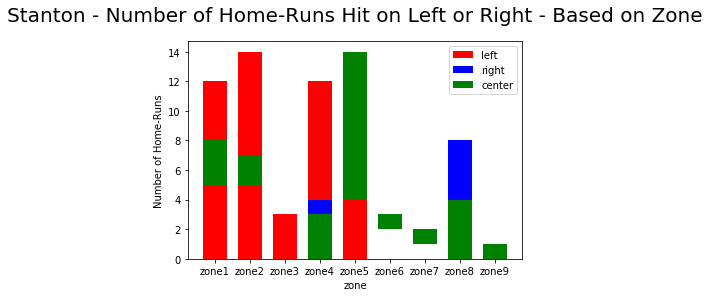

In [23]:
plt.figure()

p1 = plt.bar(zones, hitting_areas_stanton_left, width = 0.7, color='red')
p2 = plt.bar(zones, hitting_areas_stanton_right, bottom = hitting_areas_judge_left,width = 0.7, color='blue')
p3 = plt.bar(zones, hitting_areas_stanton_center, bottom = hitting_areas_judge_left,width = 0.7, color='green')
plt.ylabel('Number of Home-Runs')
plt.title('Stanton - Number of Home-Runs Hit on Left or Right - Based on Zone', pad='20', fontsize='20')
plt.legend((p1[0], p2[0], p3[0]), ('left', 'right', 'center'))
#plt.ylim(0,300)
#plt.xticks(x_values)
plt.xlabel('zone')

Stanton is defintely a more dominant left side player. He seems to be ok with the center, but it is clearly visible that forcing him to hit a home run on the right side seems to be his weakness. From the following it is very visible as to why he is very strong on this inside, it is because he is very quick on the latch on to anything close to his body; however, anything away from his body, he struggles to hit, because it seems as if the further the pitch is away the harder it becomes to hit with the type of swing he posses. I would like to futher analyse each swing. I predict that his swings which are further away would probably be weaker in comparisons to the ones that are closer to him.

In [24]:
def eachfield(player_hr):
    left_values = player_hr[player_hr["areas_hit_to"] == "left"]
    right_values = player_hr[player_hr["areas_hit_to"] == "right"]
    center_values = player_hr[player_hr["areas_hit_to"] == "center"]
    values = [left_values, right_values, center_values]
    
    return values 
    

In [25]:
judge_breakdown_values = eachfield(judge_hr)
judge_breakdown_left = judge_breakdown_values[0]
judge_breakdown_right = judge_breakdown_values[1]
judge_breakdown_center = judge_breakdown_values[2]


stanton_breakdown_values = eachfield(stanton_hr)
stanton_breakdown_left = stanton_breakdown_values[0]
stanton_breakdown_right = stanton_breakdown_values[1]
stanton_breakdown_center = stanton_breakdown_values[2]

judge_breakdown_right["launch_speed"]

50      104.1
110     107.3
190     101.9
234     108.9
301     107.6
363     103.3
1208    108.0
1771    108.3
1834    105.1
1911    112.5
2111    112.0
2340    110.5
2622     99.0
3409    101.8
Name: launch_speed, dtype: float64

Text(0.5,1,'Giancarlo Stanton\nHome Runs, 2017')

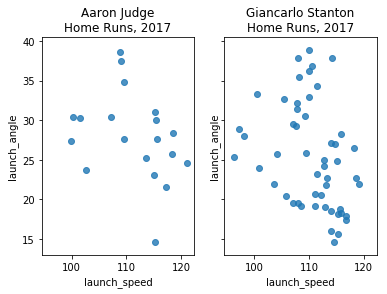

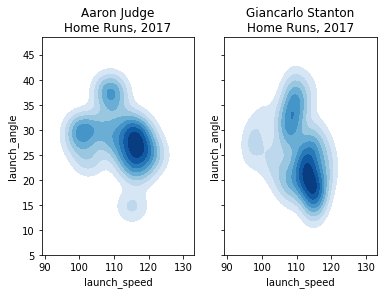

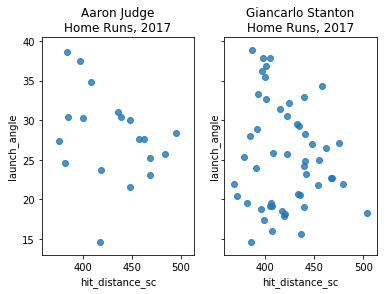

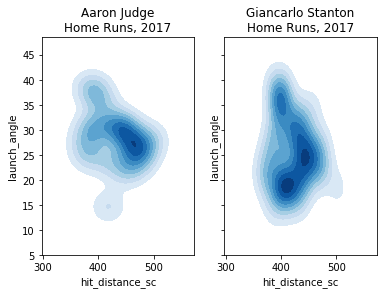

In [26]:
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x =judge_breakdown_left["launch_speed"], y =judge_breakdown_left["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.regplot(x= stanton_breakdown_left["launch_speed"], y=stanton_breakdown_left["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')

fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_breakdown_left["launch_speed"], judge_breakdown_left["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.kdeplot(stanton_breakdown_left["launch_speed"], stanton_breakdown_left["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')

fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x =judge_breakdown_left["hit_distance_sc"], y =judge_breakdown_left["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.regplot(x= stanton_breakdown_left["hit_distance_sc"], y=stanton_breakdown_left["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')

fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_breakdown_left["hit_distance_sc"], judge_breakdown_left["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.kdeplot(stanton_breakdown_left["hit_distance_sc"], stanton_breakdown_left["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')



Text(0.5,1,'Giancarlo Stanton\nHome Runs, 2017')

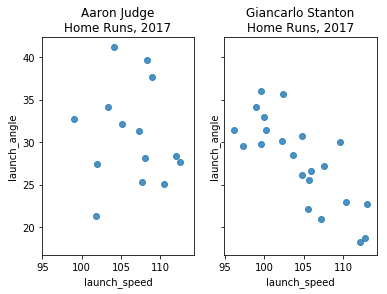

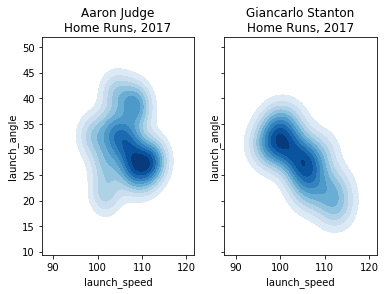

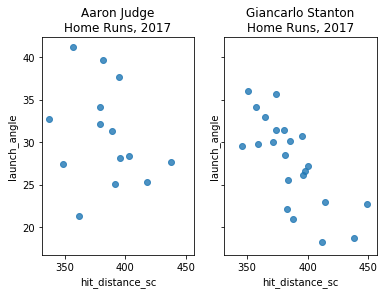

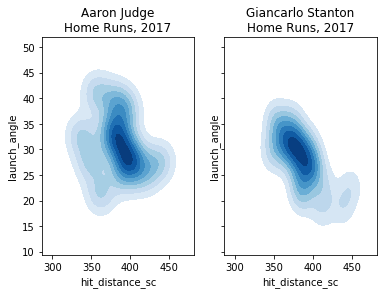

In [27]:

fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x =judge_breakdown_right["launch_speed"], y =judge_breakdown_right["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.regplot(x= stanton_breakdown_right["launch_speed"], y=stanton_breakdown_right["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')

fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_breakdown_right["launch_speed"], judge_breakdown_right["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.kdeplot(stanton_breakdown_right["launch_speed"], stanton_breakdown_right["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')

fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x =judge_breakdown_right["hit_distance_sc"], y =judge_breakdown_right["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.regplot(x= stanton_breakdown_right["hit_distance_sc"], y=stanton_breakdown_right["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')

fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_breakdown_right["hit_distance_sc"], judge_breakdown_right["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2017')
sns.kdeplot(stanton_breakdown_right["hit_distance_sc"], stanton_breakdown_right["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')



Text(0.5,1,'Giancarlo Stanton\nHome Runs, 2017 : \n Hit to Center Field')

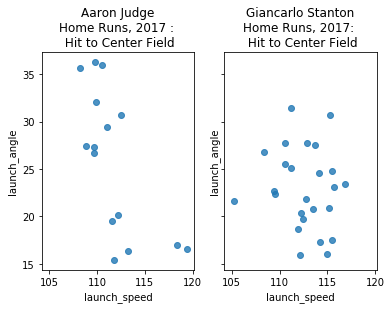

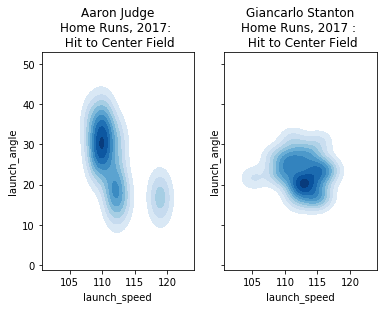

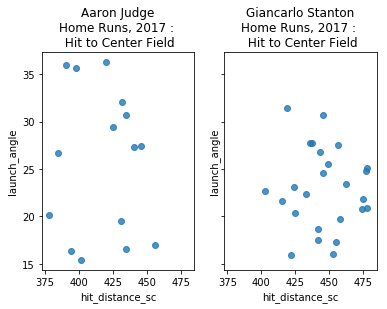

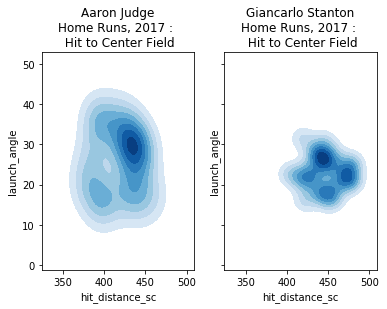

In [30]:

fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x =judge_breakdown_center["launch_speed"], y =judge_breakdown_center["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2017 : \n Hit to Center Field')
sns.regplot(x= stanton_breakdown_center["launch_speed"], y=stanton_breakdown_center["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2017: \n Hit to Center Field')

fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_breakdown_center["launch_speed"], judge_breakdown_center["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2017: \n Hit to Center Field')
sns.kdeplot(stanton_breakdown_center["launch_speed"], stanton_breakdown_center["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2017 : \n Hit to Center Field')

fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x =judge_breakdown_center["hit_distance_sc"], y =judge_breakdown_center["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2017 : \n Hit to Center Field')
sns.regplot(x= stanton_breakdown_center["hit_distance_sc"], y=stanton_breakdown_center["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2017 : \n Hit to Center Field')

fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_breakdown_center["hit_distance_sc"], judge_breakdown_center["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2017 : \n Hit to Center Field')
sns.kdeplot(stanton_breakdown_center["hit_distance_sc"], stanton_breakdown_center["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2017 : \n Hit to Center Field')



From the breakdown of each of the following sides, it confirms one thing for sure, and that is that Stanton really struggles to hit on the right side. His launch angle is a lot higher and his launch speed reduces by quite a bit. (will give the values). 
Judge on the other hand seems to hit the ball the same way to all parts of the ground. He has a varying launch angle and launch speed, which allows him to hit to all parts of the ground and not have a very strong area as opposed to Stanton where his strenggth is mostly on the left side and not on the right - Varying difference between his hiitting in the left and the right.

I would like to analyse the speeds at which Stanton hits the balls on the right side, this would confirm why he struggles on hitting to the right side and how he changes his swing to hit on the right side. 

Text(0.5,1,'Giancarlo Stanton\nHome Runs, 2017')

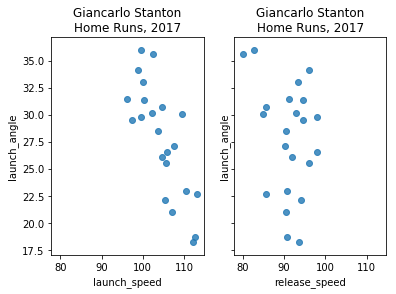

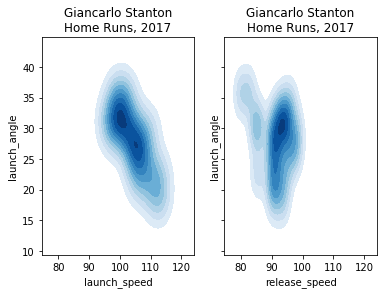

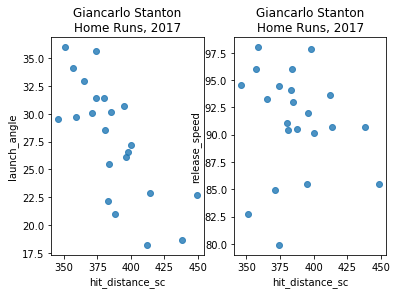

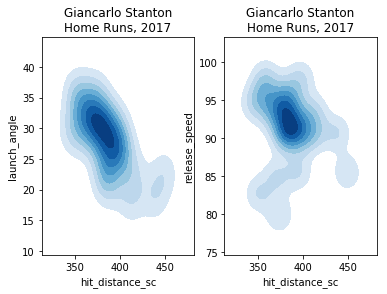

In [50]:

fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x= stanton_breakdown_right["launch_speed"], y=stanton_breakdown_right["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[0]).set_title('Giancarlo Stanton\nHome Runs, 2017')
sns.regplot(x= stanton_breakdown_right["release_speed"], y=stanton_breakdown_right["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')

fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(stanton_breakdown_right["launch_speed"], stanton_breakdown_right["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Giancarlo Stanton\nHome Runs, 2017')
sns.kdeplot(stanton_breakdown_right["release_speed"], stanton_breakdown_right["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')

fig1, axs1 = plt.subplots(ncols=2, sharex=False, sharey=False)
sns.regplot(x= stanton_breakdown_right["hit_distance_sc"], y=stanton_breakdown_right["launch_angle"], fit_reg=False, color='tab:blue', ax=axs1[0]).set_title('Giancarlo Stanton\nHome Runs, 2017')
sns.regplot(x= stanton_breakdown_right["hit_distance_sc"], y=stanton_breakdown_right["release_speed"], fit_reg=False, color='tab:blue', ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')

fig2, axs2 = plt.subplots(ncols=2, sharex=False, sharey=False)
sns.kdeplot(stanton_breakdown_right["hit_distance_sc"], stanton_breakdown_right["launch_angle"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Giancarlo Stanton\nHome Runs, 2017')
sns.kdeplot(stanton_breakdown_right["hit_distance_sc"], stanton_breakdown_right["release_speed"], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2017')


There are a couple of very interesting findings that have come about from comparing the home runs of Stanton and Judge. Both are known for their home run hitting; however, this analaysis has confirmed a couple of things. Firstly their hitting styles are completely different and their zones of comfort are very different as well. Firstly, Judge relies more or his hitting the ball at a higher launch angle to get this home-runs, his home runs are not that great in terms of distance in comparison to Stanton. He seems to rely more on timing the ball as opposed to hitting power. Moreover, because Judge tends to rely more on his timing, the findings have shown that he has a more of an all rounded hitting zone in the strike box and a greater range in terms of hitting home runs. His weakness seems to be when the ball is pitched at zone 9. This is because he has hit not a lot of home runs their. Moreover, because of the way he relies on timing the ball and using the speed of the pitcher and the launch angle to get his home runs, it would seem as if the best base would be to pitch the ball slower, so that would be below the 87 MPH mark, which would force him to generate pace and swing harder, which does not seem to be his method of scoring home runs. 75% of his home runs tend to come between 87.5 and 92 MPH which shows that he relies more on his timing. With the pitch being slower, he would be required to hit the ball harder in order to get it for a home run because it wouldnt have enough pace to carry on to cross the fence. 


Stanton on the other hand relies more on his swing speed. He tends to hit the ball a lot harder than Judge which is reflected by the comparison of their launch speed. His strong zones are low and inside, because at that zone he is able to hit the ball very hard using his hip rotation. Stanton's weakness is noted to be on low and outside (zones 6 and 9) because it forces him to the the ball on the right side. His method for hitting home runs on the right side are very different in comparison to how he hits home runs in his strength zone (zones 4, 5, 7, 8). To hit home runs in his strength area he tends to hit the ball harder and with a lower launch angle, meaning the balls would go flat; however, on the right side, he tends to have a higher launch angle and a lower launch speed, which results in his home runs on the right side reducing by about a 100 feet. This implies that he tends to use a method similar to Judge to hit it on the right side by opening the face off the bat and relying on timing. For Stanton, because he has a very high swing speed, it would be advised to pitch the balls in zones 3, 6, 9 forcing him to hit on the right side of the field. On top of that, the pitch should be slower, lower that 90 MPH which would require him to hit the ball harder on the right side which does not seem to be his comfort area, and in the process drag him to hit the ball harder as opposed to rely on timing. 


Overall, even though both have very unique hitting styles, it is seen that that both have very similar weak zones.

